In [42]:
import osgeo
import os
from os.path import join as pjoin
import rioxarray
import numpy as np
#import matplotlib as plt
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from rasterio import features
import pandas as pd
import rasterio



import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


scratch_dir = './data' 

In [1]:
tss = rioxarray.open_rasterio(pjoin(scratch_dir, 'resampledNDSI.tif'))
tss


<xarray.DataArray (band: 31, y: 4865, x: 3160)>
[476575400 values with dtype=float64]
Coordinates:
  * band         (band) int32 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30 31
  * x            (x) float64 86.44 86.44 86.44 86.44 ... 87.42 87.42 87.42 87.42
  * y            (y) float64 28.2 28.2 28.2 28.2 ... 26.87 26.87 26.87 26.87
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-1cfb2a8e6c5c622c602f6845aa2142c5

In [3]:
tss.coords['band'] = tss.coords['band']+1991

In [4]:
tss = tss.dropna(dim = 'band', how = 'all')

In [5]:
tss

<xarray.DataArray (band: 11, y: 4865, x: 3160)>
array([[[-0.14784 , -0.157218, ..., -0.104366, -0.091052],
        [-0.159492, -0.172754, ..., -0.091068, -0.097919],
        ...,
        [-0.089377, -0.048387, ..., -0.071307, -0.062141],
        [-0.061107, -0.068224, ..., -0.055325, -0.066058]],

       [[-0.207745, -0.218139, ..., -0.102801, -0.092216],
        [-0.219454, -0.240309, ..., -0.106458, -0.111764],
        ...,
        [-0.12257 , -0.114146, ..., -0.161191, -0.143834],
        [-0.108339, -0.110734, ..., -0.154405, -0.126759]],

       ...,

       [[-0.206826, -0.211175, ..., -0.108796, -0.097199],
        [-0.207346, -0.228964, ..., -0.116713, -0.11864 ],
        ...,
        [-0.13546 , -0.146489, ...,  0.0123  ,  0.008976],
        [-0.119872, -0.143001, ..., -0.032177, -0.039855]],

       [[-0.187024, -0.156246, ..., -0.129714, -0.121704],
        [-0.16032 , -0.183418, ..., -0.133766, -0.130036],
        ...,
        [-0.157659, -0.144332, ..., -0.075852, -0.071213],
        [-0.155217, -0.128434, ..., -0.079788, -0.085091]]])
Coordinates:
  * band         (band) int32 1992 1995 1998 2001 2004 ... 2013 2016 2019 2022
  * x            (x) float64 86.44 86.44 86.44 86.44 ... 87.42 87.42 87.42 87.42
  * y            (y) float64 28.2 28.2 28.2 28.2 ... 26.87 26.87 26.87 26.87
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-1cfb2a8e6c5c622c602f6845aa2142c5

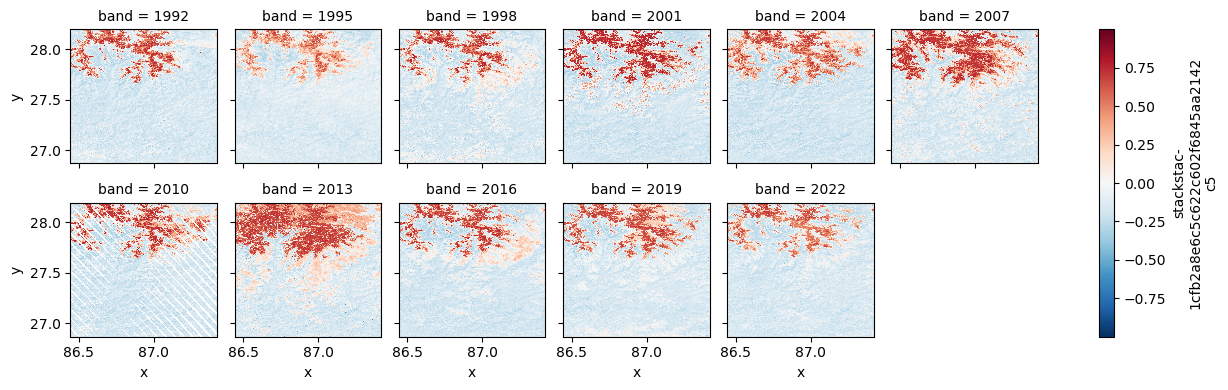

In [6]:
tss.plot.imshow(col="band",  col_wrap=6, size=2)

In [53]:
aoi = gpd.read_file("data/Train/classifications/Classifications.shp")
aoi = aoi[['layer', 'is_glacier', 'geometry']]
aoi.is_glacier = aoi.is_glacier.astype(str)
print (aoi.tail())

                layer is_glacier  \
80  Rivier Dnudh Kosi          0   
81               Rots          0   
82               Rots          0   
83               Rots          0   
84               Rots          0   

                                             geometry  
80  POLYGON ((86.71343 27.72815, 86.71342 27.72814...  
81  POLYGON ((86.82155 28.19028, 86.82148 28.19008...  
82  POLYGON ((86.86028 28.14301, 86.85935 28.14468...  
83  POLYGON ((87.33841 28.14561, 87.33048 28.14714...  
84  POLYGON ((86.47362 28.13161, 86.47442 28.13208...  


In [122]:
file_location = 'data/train_data_resampledNDSI.tif'
d = rioxarray.open_rasterio(file_location).squeeze() 

d  # Show data information

<xarray.DataArray (y: 4862, x: 3159)>
[15359058 values with dtype=float64]
Coordinates:
    band         int32 1
  * x            (x) float64 86.44 86.44 86.44 86.44 ... 87.42 87.42 87.42 87.42
  * y            (y) float64 28.2 28.2 28.2 28.19 ... 26.87 26.87 26.87 26.87
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-d42d0619068e066ce98c79604ae111fd

[(0.6784463372420639, 0.709895946274658, 0.7827866176656862), (0.4150230332622613, 0.47643753726002325, 0.6160711470607904), (0.1515997292824586, 0.24297912824538842, 0.4493556764558945), (0.8542661358867473, 0.9028298179271103, 0.6514621522017867), (0.7758674151986055, 0.8528621054219891, 0.42352538672770157), (0.6974686945104636, 0.8028943929168681, 0.19558862125361637)]


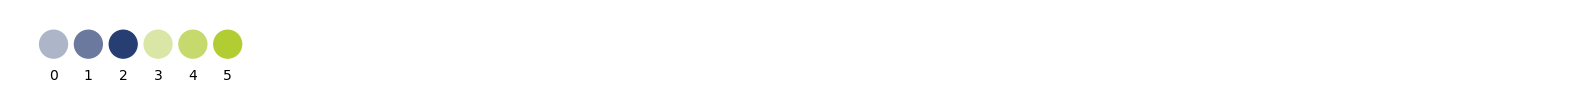

In [172]:
# Below is a visualization of the sample LULC areas superimposed on a satellite image of part of the Netherlands

# We also prepare the color codes for visualization
colors = [(257, 71, 27), (98, 93, 78)]
cols = []
for col in colors:
    pal = sns.light_palette(col, input="husl", n_colors=4)
    for rgb in pal[1:]:
        cols.append(rgb)
print(cols)

# A preview of color codes. Please delete the triple quotation marks to run the code.

fig, ax = plt.subplots(figsize=(20, 5))
for i, c in enumerate(cols):
    ax.add_artist(plt.Circle((i, 0), 0.4, color=c))
    plt.text(i, -1, i, horizontalalignment='center')
    ax.set_axis_off()
    ax.set_aspect(1)
    ax.autoscale()
    plt.xlim(-1.25,43.25)
    plt.ylim(-1,1)


# Assign color codes to LULC types 
symbology = {'Glacier': cols[5],
             'Non Glacier': cols[0]}

# # Visualize
# fig,ax = plt.subplots(1,1, figsize=(9,9))
# d.plot(ax=ax, cmap='gray', alpha=0.25, add_colorbar=False)  # Plot the satellite image
# aoi.plot(ax=ax, column='is_glacier', legend=True)  # Plot the LULC samples


# custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
# leg_points = ax.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
# ax.add_artist(leg_points)

In [174]:
aoi = gpd.read_file("data/Train/classifications/Classifications.shp")
aoi = aoi[['layer', 'is_glacier', 'geometry']]

aoi['is_glacier'].loc[aoi['is_glacier']==0] = 2
aoi

,layer,is_glacier,geometry
0,Barun,1,"POLYGON ((86.99117 27.88994, 86.99123 27.89032..."
1,Barun,1,"POLYGON ((86.98462 27.89381, 86.98466 27.89437..."
2,Barun,1,"POLYGON ((87.01963 27.95332, 87.02055 27.95233..."
3,Barun,1,"POLYGON ((87.02968 27.94483, 87.02972 27.94504..."
4,Barun,1,"POLYGON ((86.99370 27.91944, 86.99363 27.91984..."
...,...,...,...
80,Rivier Dnudh Kosi,2,"POLYGON ((86.71343 27.72815, 86.71342 27.72814..."
81,Rots,2,"POLYGON ((86.82155 28.19028, 86.82148 28.19008..."
82,Rots,2,"POLYGON ((86.86028 28.14301, 86.85935 28.14468..."
83,Rots,2,"POLYGON ((87.33841 28.14561, 87.33048 28.14714..."


In [175]:
# Labels from the AOIs
aoi['aoi_cat'] = pd.Categorical(aoi['is_glacier'])

# Rasterize
rst = rasterio.open('data/train_data_resampledNDSI.tif')  # Base image to rasterize the *.shp
meta = rst.meta.copy()  # Copy metadata from the base image
meta.update(compress='lzw')

# Burn the AOIs *.shp file into raster and save it
out_rst = 'data/train/aoi_rasterized.tif'
with rasterio.open(out_rst, 'w+', **meta) as out:
    out_arr = out.read(1)

    # Create a generator of geom, value pairs to use in rasterizing
    shapes = ((geom,value) for geom, value in zip(aoi.geometry, aoi.aoi_cat))

    burned = features.rasterize(shapes=shapes, fill=0, out=out_arr, transform=out.transform)
    out.write_band(1, burned)

In [176]:
stack = np.array([])

print(d.shape)  # Each time, also check the size of the image
    
# In order to do clustering, image should be reshaped into a single column
band_col = d.values.reshape(-1, 1)
   
# Each time put the reshaped image into the stack
stack = np.hstack((stack, band_col)) if stack.size else band_col
# Also to check the size of the stack
print(stack.shape)

(4862, 3159)
(15359058, 1)


In [177]:
# Load the rasterized LULC types in the AOI and concatenate it together with the images

aoi_rst = rasterio.open('data/train/aoi_rasterized.tif').read(1)

# Stack the label with the input bands
data = np.c_[stack, aoi_rst.reshape(-1,)]

# Of course, we are only interested in pixels with LULC type labelled
data = data[np.where(data[:,data.shape[1]-1]!=0)]
#print(data)

# Recall our function for preparing training and test datasets.
# This time we re-write it a little bit to let the users of the function to split the data into training and test sets.
training_proportion = 0.3
np.random.shuffle(data)  # Shuffle the data so that LULC types can spread over training and test sets
X_train = data[:int(training_proportion*len(data)), :1]  # 70% of data for training
X_test = data[int(training_proportion*len(data)):, :1]  # 30% for testing
Y_train = data[:int(training_proportion*len(data)), 1:].reshape(-1,)  # 70% of data for training
print(Y_train)
Y_test = data[int(training_proportion*len(data)):, 1:].reshape(-1,)  # 30% for testing


[2. 1. 1. ... 2. 1. 1.]


In [139]:
for y in Y_train:
    print(y)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
2.0
1.0
2.0
2.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
2.0
1.0
2.0
2.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
2.0
2.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0


In [179]:
aoi['is_glacier'].loc[aoi['is_glacier'] == 1] = 'Glacier'
aoi['is_glacier'].loc[aoi['is_glacier'] == 2] = 'Non Glacier'
aoi

,layer,is_glacier,geometry,aoi_cat
0,Barun,Glacier,"POLYGON ((86.99117 27.88994, 86.99123 27.89032...",1
1,Barun,Glacier,"POLYGON ((86.98462 27.89381, 86.98466 27.89437...",1
2,Barun,Glacier,"POLYGON ((87.01963 27.95332, 87.02055 27.95233...",1
3,Barun,Glacier,"POLYGON ((87.02968 27.94483, 87.02972 27.94504...",1
4,Barun,Glacier,"POLYGON ((86.99370 27.91944, 86.99363 27.91984...",1
...,...,...,...,...
80,Rivier Dnudh Kosi,Non Glacier,"POLYGON ((86.71343 27.72815, 86.71342 27.72814...",2
81,Rots,Non Glacier,"POLYGON ((86.82155 28.19028, 86.82148 28.19008...",2
82,Rots,Non Glacier,"POLYGON ((86.86028 28.14301, 86.85935 28.14468...",2
83,Rots,Non Glacier,"POLYGON ((87.33841 28.14561, 87.33048 28.14714...",2


In [171]:
symbology

{'Glacier': (0.6974686945104636, 0.8028943929168681, 0.19558862125361637),
 'Not Glacier': (0.6784463372420639, 0.709895946274658, 0.7827866176656862)}

                 y
0      Non Glacier
1          Glacier
2          Glacier
3          Glacier
4          Glacier
...            ...
98611      Glacier
98612  Non Glacier
98613  Non Glacier
98614      Glacier
98615      Glacier

[98616 rows x 1 columns]


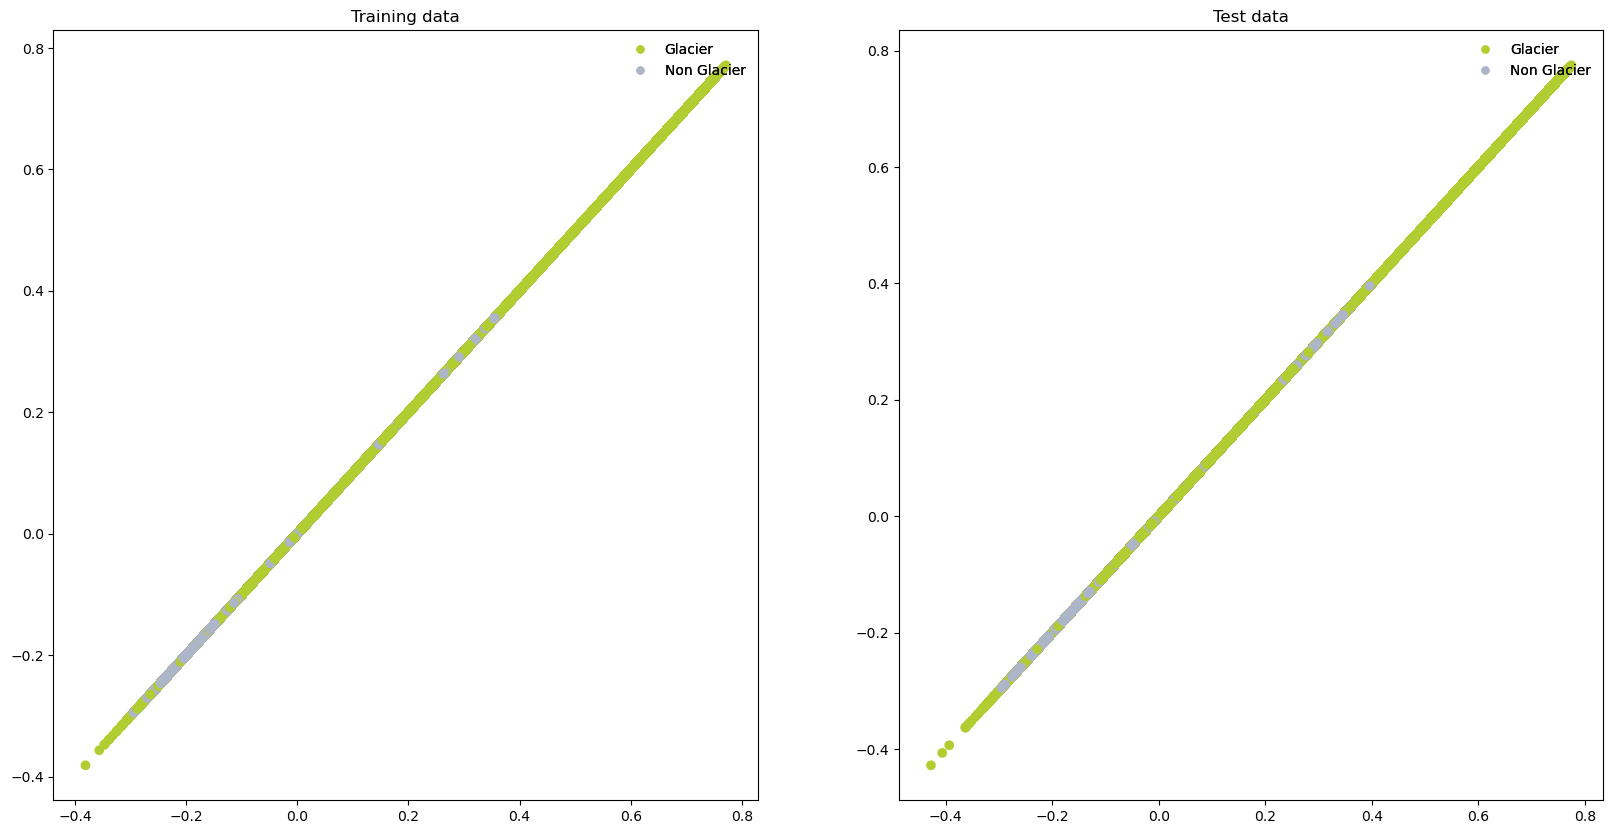

In [180]:
# Visualize the training and test datasets

# Assign color codes to LULC types for visualizing the datasets
# We take advantage of the categorical code from the AOI to map training and test data into explicit LULC names
classes = aoi.loc[:,['is_glacier', 'aoi_cat']].drop_duplicates()
class_dict = {k:v for k,v in zip(classes.aoi_cat, classes.is_glacier)}
Y_train_categ = np.array([class_dict[y] for y in Y_train])
Y_test_categ = np.array([class_dict[y] for y in Y_test])

# Visualize

fig1,(ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

df1 = pd.DataFrame(Y_train_categ, columns = ['y'])
print(df1)
ax1.scatter(X_train[:, 0], X_train[:, 0], c=df1['y'].map(symbology), label='LULC types')
ax1.set_title('Training data')

custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax1.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax1.add_artist(leg_points)

df2 = pd.DataFrame(Y_test_categ, columns = ['y'])
ax2.scatter(X_test[:, 0], X_test[:, 0], c=df2['y'].map(symbology), label='LULC types')
ax2.set_title('Test data')

custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax2.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax2.add_artist(leg_points)

[Text(0.5, 0.875, 'x[0] <= -0.106\ngini = 0.355\nsamples = 98616\nvalue = [75872, 22744]'),
 Text(0.25, 0.625, 'x[0] <= -0.143\ngini = 0.349\nsamples = 21222\nvalue = [4771, 16451]'),
 Text(0.125, 0.375, 'x[0] <= -0.244\ngini = 0.279\nsamples = 16622\nvalue = [2790, 13832]'),
 Text(0.0625, 0.125, 'gini = 0.481\nsamples = 1498\nvalue = [603, 895]'),
 Text(0.1875, 0.125, 'gini = 0.247\nsamples = 15124\nvalue = [2187, 12937]'),
 Text(0.375, 0.375, 'x[0] <= -0.126\ngini = 0.49\nsamples = 4600\nvalue = [1981, 2619]'),
 Text(0.3125, 0.125, 'gini = 0.452\nsamples = 2169\nvalue = [748, 1421]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 2431\nvalue = [1233, 1198]'),
 Text(0.75, 0.625, 'x[0] <= 0.369\ngini = 0.149\nsamples = 77394\nvalue = [71101, 6293]'),
 Text(0.625, 0.375, 'x[0] <= -0.091\ngini = 0.295\nsamples = 34528\nvalue = [28324, 6204]'),
 Text(0.5625, 0.125, 'gini = 0.466\nsamples = 2155\nvalue = [1358, 797]'),
 Text(0.6875, 0.125, 'gini = 0.278\nsamples = 32373\nvalue = [26966, 5407

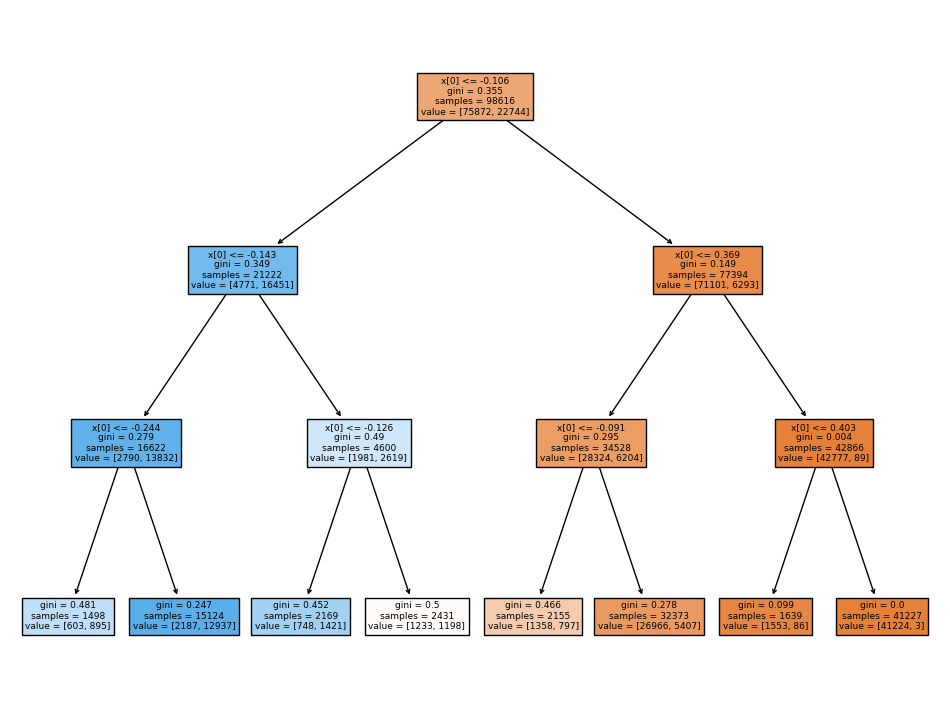

In [184]:
# Import sklearn along with all necessary modules

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error

# Initiate a tree model
tree_depth = 3
model_tree = DecisionTreeClassifier(max_depth=tree_depth)

# Fit the model to your data.
# Please note that the output of this fitting is a model with several parameters that are configurable, so far you only configured "max_depth" while training/fitting.
model_tree.fit(X_train, Y_train)

# Visualize split
fig = plt.figure(figsize=(tree_depth*4,tree_depth*3))
tree.plot_tree(model_tree, filled=True)

In [185]:
Y_pred = pd.Series(list(model_tree.predict(X_test[:,0].reshape(-1,1))), name='DT prediction')  # Store the predicted value in Y_pred
Y_actu = pd.Series(list(Y_test), name='Manual delineation')

# Map the LULC codes to the actual name of LULC types

# First we need a mapping from the LULC codes to the actual LULC type name.
code_lulc = { 1: 'Glacier',
              2: 'Non Glacier'}

# Now replace the non-intuitive numbers with actual LULC type names and store them into new variables
Y_actu2 = Y_actu.replace(code_lulc)
Y_pred2 = Y_pred.replace(code_lulc)

# Show the LULC coded confusion matrix
df_confusion2 = pd.crosstab(Y_actu2, Y_pred2)
df_confusion2

DT prediction,Glacier,Non Glacier
Manual delineation,,
Glacier,168403,8416
Non Glacier,17429,35858


In [186]:
# Print out more detailed accuracy assessment report

from sklearn.metrics import classification_report

print(classification_report(Y_actu2, Y_pred2))

              precision    recall  f1-score   support

     Glacier       0.91      0.95      0.93    176819
 Non Glacier       0.81      0.67      0.74     53287

    accuracy                           0.89    230106
   macro avg       0.86      0.81      0.83    230106
weighted avg       0.88      0.89      0.88    230106



In [189]:
# The tree can also be visualized in a different way to see how data has been splitted.
# Let's plot how the features split the data

# Plot parameters
plot_colors = "ryb"
plot_step = 100

# Plot the decision boundary
plt.figure(figsize=(6, 6))

x_min, x_max = X_test[:, 0].min() - 1000, X_test[:, 0].max() + 1000
y_min, y_max = X_test[:, 1].min() - 1000, X_test[:, 1].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.xlabel('feature_1')
plt.ylabel('feature_2')

plt.scatter(X_test[:, 0], X_test[:, 0], c=Y_test.reshape(Y_test.shape[0]), cmap='Oranges', edgecolor='black', s=45)

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 600x600 with 0 Axes>

In [190]:

Y_pred_all = model_tree.predict(stack)

c:\Users\Jurrian\anaconda3\envs\ssml\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Printing large image takes time...


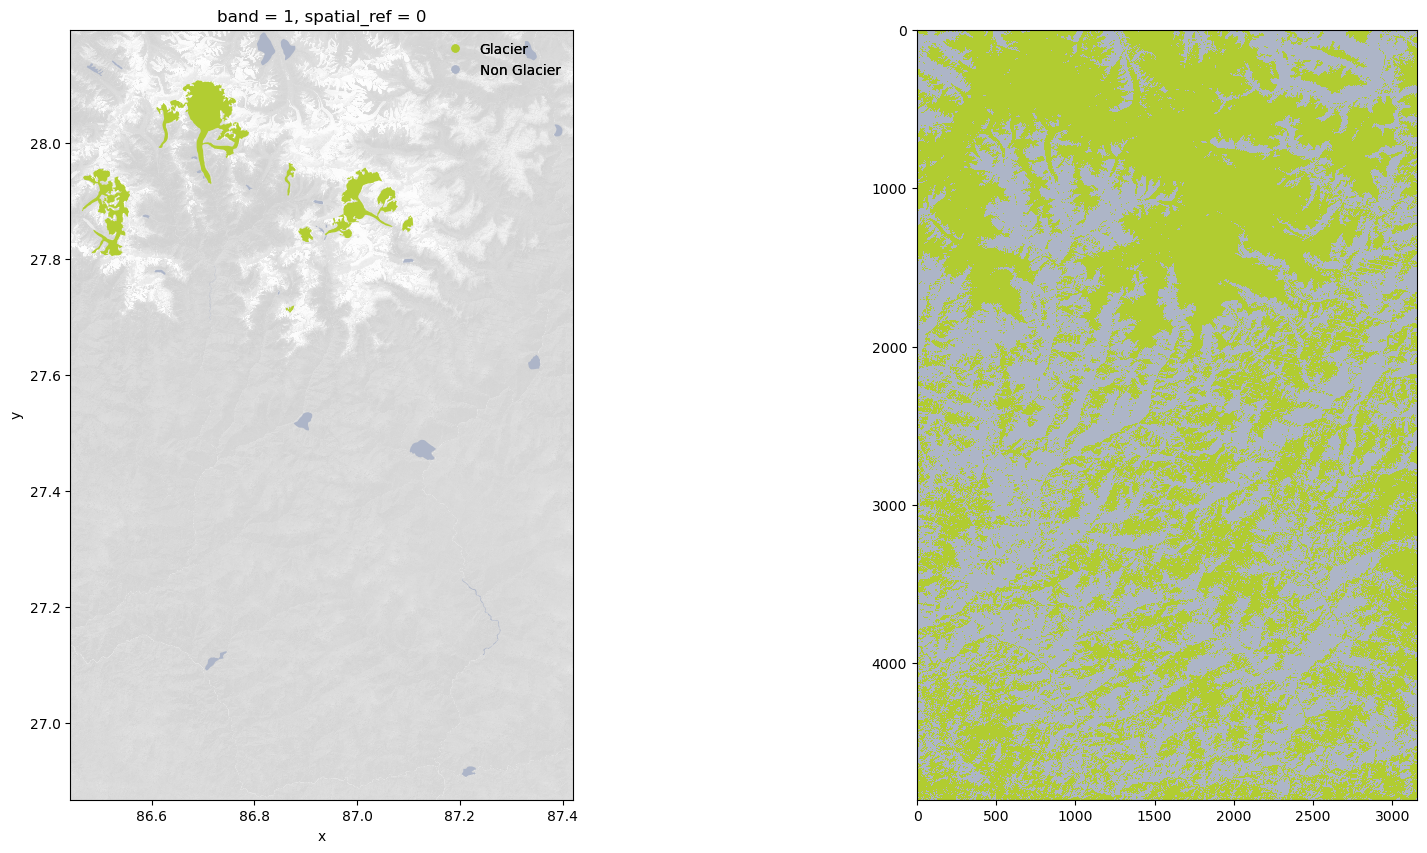

In [195]:
# Visualize
fig1,(ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
d.plot(ax=ax1, cmap='gray', alpha=0.25, add_colorbar=False)  # Plot the satellite image
aoi.plot(ax=ax1, column='land_cover', legend=True, color=aoi['is_glacier'].map(symbology))

from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=5, color=color) for color in symbology.values()]
leg_points = ax1.legend(custom_points, symbology.keys(), loc='upper right', frameon=False)
ax1.add_artist(leg_points)

# Assign color codes to LULC types 
symbology2 = {1: cols[5],
              2: cols[0]}

from matplotlib.colors import ListedColormap
cm = ListedColormap(symbology2.values())
imin = min(symbology2)  # Colormap range
imax = max(symbology2)

# Visualize
# Because the predicted labels are still in one column, you need to reshape it back to original image shape
row, col = d.shape  # Get the original dimensions of the image
imin = min(symbology2)  # Colormap range
imax = max(symbology2)

print('Printing large image takes time...')
ax2.imshow(Y_pred_all.reshape(row, col), cmap=cm, interpolation='none', vmin=imin, vmax=imax)